In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\EDA\COVID 19\covid_19_data.csv")
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [3]:
df.memory_usage(deep=True).sum()

64941

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['State'] = df['State'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Confirmed'] = df['Confirmed'].astype('int16')
df['Deaths'] = df['Deaths'].astype('int16')
df['Recovered'] = df['Recovered'].astype('int16')

In [5]:
df.memory_usage(deep=True).sum()

35694

In [6]:
#find null values

In [7]:
df['Date'].isnull().unique()

array([False])

In [8]:
# Date dont have null values

In [9]:
df['State'].isnull().unique()

array([ True, False])

In [10]:
# state columns contains null values
# now find the number of null values present

In [11]:
df['State'].isnull().sum()

181

In [12]:
df['State'].value_counts()

Grand Princess                  2
Recovered                       2
Diamond Princess cruise ship    2
Alabama                         1
Oregon                          1
                               ..
Hawaii                          1
Hainan                          1
Guizhou                         1
Guangxi                         1
Zhejiang                        1
Name: State, Length: 137, dtype: int64

In [13]:
df.value_counts()

Date        State                  Region          Confirmed  Deaths  Recovered
2020-04-29  Alabama                US              6912       256     0            1
            Oregon                 US              2446       101     0            1
            Northern Territory     Australia       28         0       25           1
            Northwest Territories  Canada          5          0       0            1
            Nova Scotia            Canada          935        28      0            1
                                                                                  ..
            Guangxi                Mainland China  254        2       252          1
            Guangdong              Mainland China  1588       8       1557         1
            Guam                   US              141        5       0            1
            Guadeloupe             France          149        12      82           1
            Zhejiang               Mainland China  1268       1       

In [14]:
df.dropna(subset=['State'], inplace=True)

In [15]:
df.memory_usage(deep=True).sum()

33428

In [16]:
df.value_counts()

Date        State                  Region          Confirmed  Deaths  Recovered
2020-04-29  Alabama                US              6912       256     0            1
            Oregon                 US              2446       101     0            1
            Northern Territory     Australia       28         0       25           1
            Northwest Territories  Canada          5          0       0            1
            Nova Scotia            Canada          935        28      0            1
                                                                                  ..
            Guangxi                Mainland China  254        2       252          1
            Guangdong              Mainland China  1588       8       1557         1
            Guam                   US              141        5       0            1
            Guadeloupe             France          149        12      82           1
            Zhejiang               Mainland China  1268       1       

In [17]:
df['State'].isnull().unique()

array([False])

In [18]:
df['Region'].isnull().unique()

array([False])

In [19]:
df['Confirmed'].isnull().unique()

array([False])

In [20]:
df['Deaths'].isnull().unique()

array([False])

In [21]:
df['Recovered'].isnull().unique()

array([False])

In [22]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
181,2020-04-29,Alabama,US,6912,256,0
182,2020-04-29,Alaska,US,355,9,0
183,2020-04-29,Alberta,Canada,5165,87,0
184,2020-04-29,Anguilla,UK,3,0,3
185,2020-04-29,Anhui,Mainland China,991,6,985


In [23]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered,Year
181,2020-04-29,Alabama,US,6912,256,0,2020
182,2020-04-29,Alaska,US,355,9,0,2020
183,2020-04-29,Alberta,Canada,5165,87,0,2020
184,2020-04-29,Anguilla,UK,3,0,3,2020
185,2020-04-29,Anhui,Mainland China,991,6,985,2020


In [33]:
df['Confirmed'].unique()

array([  6912,    355,   5165,      3,    991,   7209,   3193,    100,
          106,    593,    111,      5,   2087,      6, -16789,     73,
          537,    579,  14758,  26767,     16,   4655,      0,     49,
         4106,     13,    187, -32343,    125,     58,    139,  25775,
          141,    103,     11,    149,   1588,    254,    147,    168,
          613,    328,    939,   1276,   1037,   2592,   1019,   1952,
       -15178,  17182,    200,   6843,    313,    653,    937,   3839,
         4537,    146,  27660,     45,   1056,    275,    175,  20849,
        -5271,    460, -25137,   4644,   6569,   7660,    451,   3851,
         4934,    118,     18,   2058, -14707,   3213,   3016, -27989,
          258,     75,  10180,   1033,     14,     28,    935,  17303,
         3473,  16978,   2446, -19209,     27,   1433,  26610,    420,
         8247,      1,    383,    306,    787,    647,    197,    561,
          438,   5882,   2373,     38,    219,  10366,  27257,    190,
      

In [34]:
df['Deaths'].unique()

array([  256,     9,    87,     0,     6,   308,    57,     2,     3,
         109,     1,  1946,    38,   766,  2169,   144,   205,  1218,
        1101,    12,     5,     8,    16,    13,    22,     4,  4512,
          60,  2215,   964,   148,    21,   134,   234,  1845,    52,
          14,  1078,  3405,  3670,   319,   250,   338,    56,   230,
        6771,   112,    40, 23477,   382,    19,    28,   937,   214,
        1153,   101,  2373,    86,  1762,   251,     7,   231,   195,
         754,    45,    47,    18,   522,   801], dtype=int16)

In [35]:
df = df[(df['Confirmed'] >= 0) & (df['Deaths'] >= 0)]

In [24]:
# Reorder columns to place 'Year' at the first position
df = df[['Year'] + [col for col in df.columns if col != 'Year']]
df.head(1)

,Year,Date,State,Region,Confirmed,Deaths,Recovered
181,2020,2020-04-29,Alabama,US,6912,256,0


In [25]:
# visualization

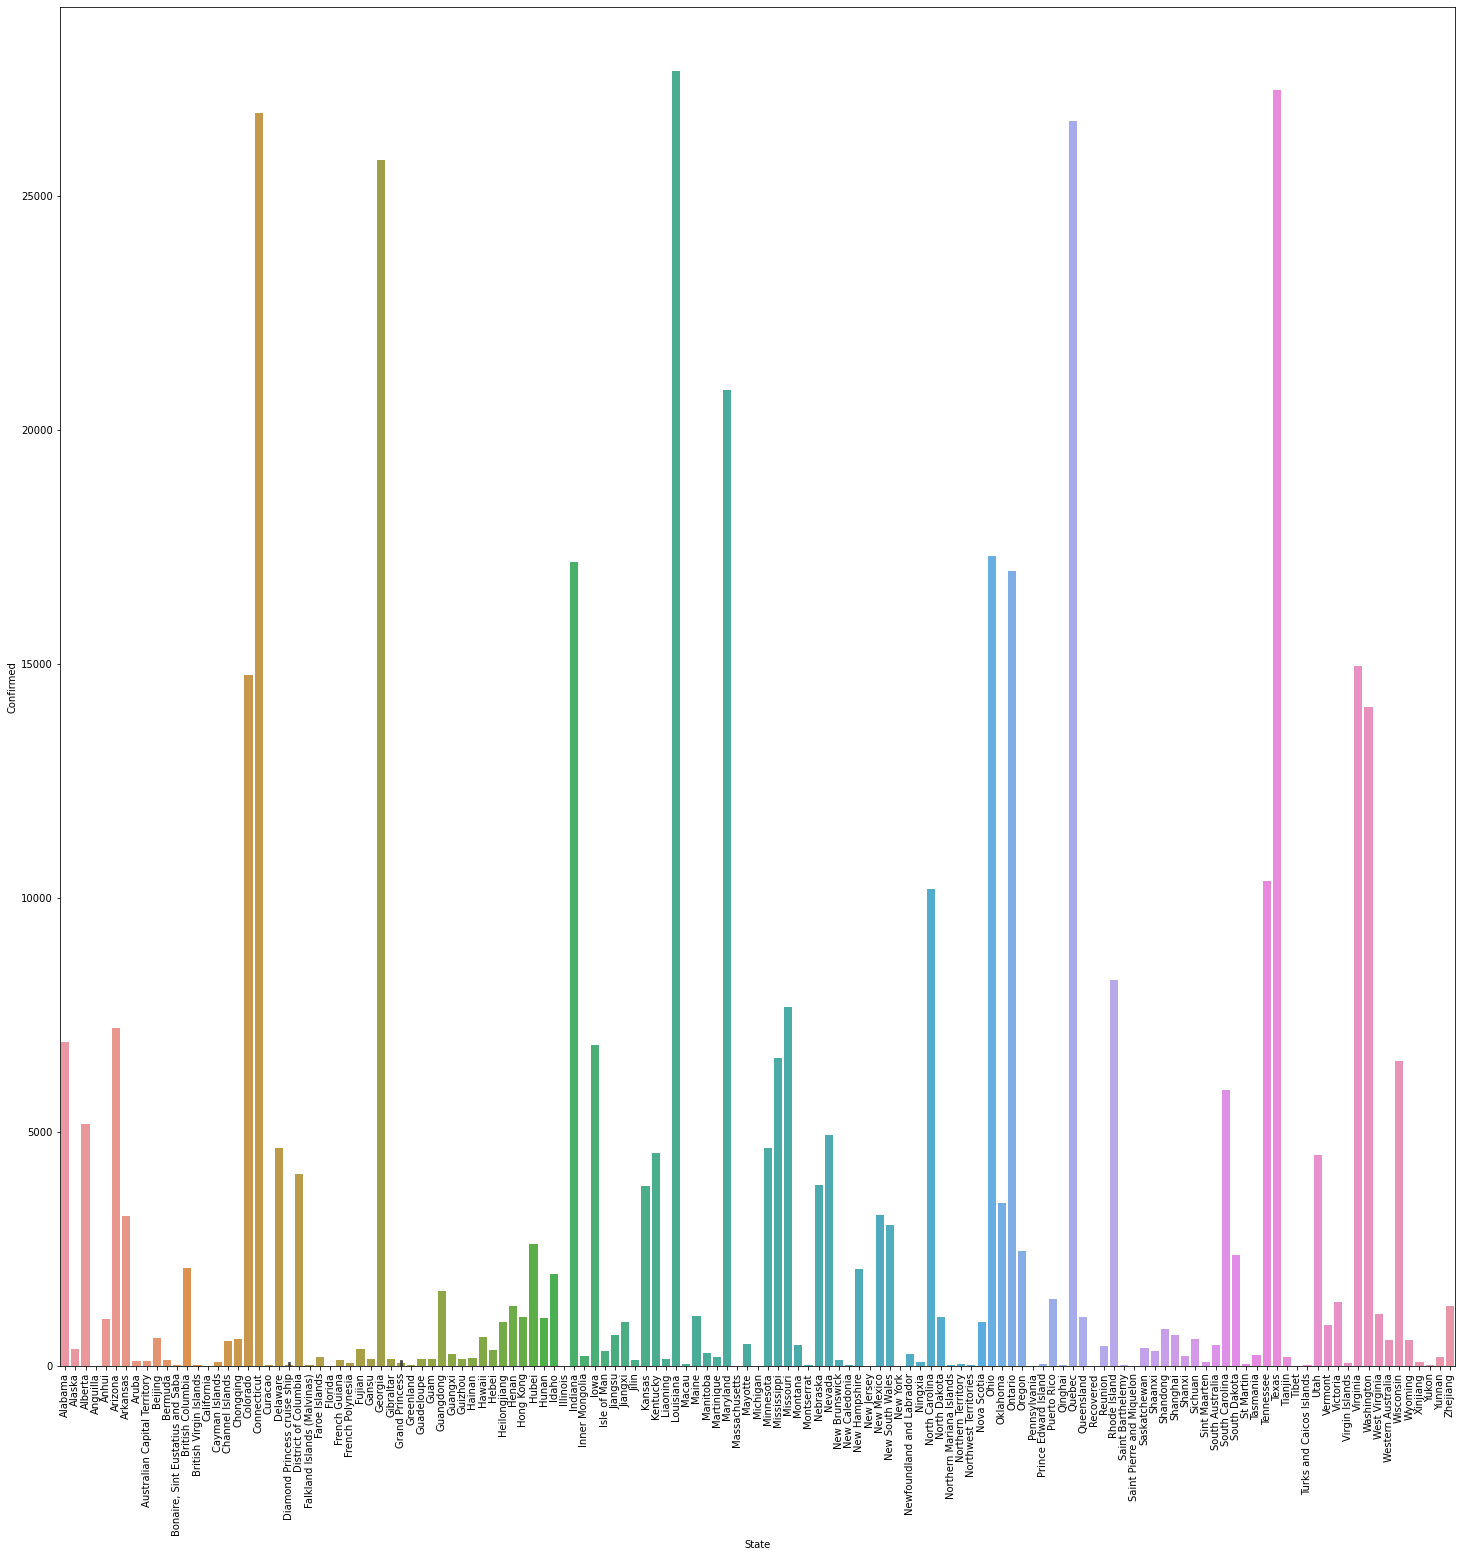

In [41]:
import seaborn as sns
plt.figure(figsize=(25, 25))
sns.barplot(x='State', y='Confirmed', data=df)
plt.xticks(rotation=90)
plt.show()

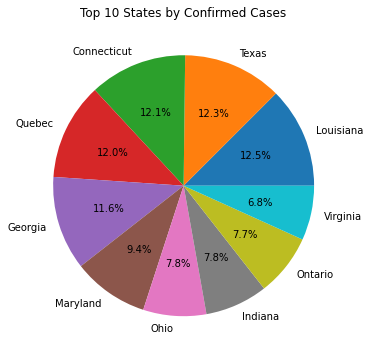

In [44]:
plt.figure(figsize=(6, 6))
top_n_states = df.nlargest(10, 'Confirmed')
plt.pie(top_n_states['Confirmed'], labels=top_n_states['State'], autopct='%1.1f%%')
plt.title(f'Top 10 States by Confirmed Cases')
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_10336\1671989680.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


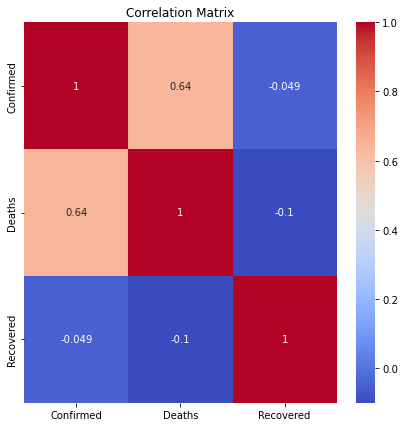

In [58]:
col = ['State', 'Confirmed', 'Deaths', 'Recovered']
df1 = df[col]
plt.figure(figsize=(7, 7))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation between Confirmed and Deaths: The coefficient is 0.64, indicating a strong positive correlation. This means that as the number of confirmed cases increases, the number of deaths also tends to increase.

Correlation between Confirmed and Recovered: The coefficient is -0.049, indicating a negative correlation. This means that as the number of confirmed cases increases, the number of recoveries tends to decrease.

Correlation between Deaths and Recovered: The coefficient is -0.1, indicating a strong negative correlation. This means that as the number of deaths increases, the number of recoveries tends to decrease.